## 1. Mixing patterns in networks

### (a) Prove that the degree assortativity coefficient corresponds to the fraction of the covariance $cov(d_{i}, d_{j})$ of degrees of connected node pairs i, j and the variance $var(d_{i})$ of the degree of nodes i, which are endpoints of randomly chosen edges. Hint: Start your proof from a definition of the average degree of nodes i, which are endpoints of randomly chosen edges (i, j) in an undirected network.

First of all the hint in the task tells us to describe the average degree of the nodes. The average degree can be calculated by the formula:

$$\mu = \frac{\sum_{ij} A_{ij} d_{i}}{\sum_{ij} A_{ij}} = \frac{1}{2m} \sum_{ij} d_{i} d_{i}$$

We sum all degrees of the nodes and divide by number of nodes which are incident to edges.


Now we can use a covariance formula:

$$cov(d_{i}, d_{j}) = \frac{1}{2m} \sum_{ij} A_{ij} (d_{i} - \mu)(d_{j} - \mu) \\=
\frac{1}{2m} \sum_{ij} A_{ij} (d_{i}d_{j} - \mu d_{i} - \mu d_{j} + \mu^{2}) \\=
\frac{1}{2m} \sum_{ij} A_{ij} d_{i}d_{j} - \mu^{2} - \mu^{2} + \mu^{2} \\=
\frac{1}{2m} \sum_{ij} A_{ij} d_{i}d_{j} - \mu^{2} \\=
\frac{1}{2m} \sum_{ij} A_{ij} d_{i}d_{j} - \frac{1}{4m^{2}} \sum_{ij} d_{i}d{j}d{i}d{j} \\=
\frac{1}{2m} \sum_{ij} (A_{ij} - \frac{d_{i}d{j}}{2m}) d_{i}d_{j}
$$

Not lets use the variance formula:

$$var(d_{i}) = \frac{1}{2m} \sum_{ij} A_{ij}(d_{i} - \mu)^{2} \\=
\frac{1}{2m} \sum_{ij} A_{ij}(d_{i}^{2} - 2d_{i}\mu - \mu^{2}) \\=
\frac{1}{2m} \sum_{ij} A_{ij}d_{i}^{2} - \mu^{2} \\=
\frac{1}{2m} \sum_{ij} A_{ij}d_{i}^{2} - \frac{1}{4m^{2}} \sum_{ij} d_{i}d{j}d{i}d{j} \\=
\frac{1}{2m} \sum_{ij} (d_{i}\delta_{ij} - \frac{d_{i}d{j}}{2m}) d_{i}d_{j} \\,
\delta_{ij} = A_{ij}d_{j}
$$

Lets join these formulas:

$$\frac{cov(d_{i}, d_{j})}{var(d_{i})} = \frac{\sum_{ij} (A_{ij} - \frac{d_{i}d{j}}{2m}) d_{i}d_{j}}{\sum_{ij} (d_{i}\delta_{ij} - \frac{d_{i}d{j}}{2m}) d_{i}d_{j}}$$

As you can see formulas are identical.

### (b) Give examples for networks with positive, negative, and zero degre assortativity. Demonstrate the correctness of your solution in pathpy.

In [2]:
from scipy import stats
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt

import pathpy as pp

from constants import ROOT_DIR

A fully connected cluster of nodes with higher degrees, as well as pairs of nodes with smaller degrees that are connected to each other exhibits maximum positive assortative mixing.

In [3]:
n_max = pp.Network(directed=False)
n_max.add_edge('a', 'b')
n_max.add_edge('b', 'c')
n_max.add_edge('c', 'a')
n_max.add_edge('d', 'a')
n_max.add_edge('d', 'b')
n_max.add_edge('d', 'c')

n_max.add_edge('e', 'f')
n_max.add_edge('g', 'h')
n_max.add_edge('i', 'j')
n_max.add_edge('k', 'l')
n_max.plot()

In [4]:
pp.statistics.degree_assortativity(n_max)

1.0

A star network, in which exclusively nodes with maximally different degrees are connected to each other would have minimum degree assortativity.

In [5]:
n_min = pp.Network(directed=False)
n_min.add_edge('a', 'b')
n_min.add_edge('a', 'c')
n_min.add_edge('a', 'd')
n_min.add_edge('a', 'e')
n_min.add_edge('a', 'f')
n_min.add_edge('a', 'g')
n_min.add_edge('a', 'h')
n_min.add_edge('a', 'i')
n_min.plot()

In [6]:
pp.statistics.degree_assortativity(n_min)

-1.0

And finally, a network that has zero degree assortativity.

In [7]:
n_zero = pp.Network(directed=False)
n_zero.add_edge('b', 'c')
n_zero.add_edge('c', 'd')
n_zero.add_edge('d', 'e')
n_zero.add_edge('e', 'a')
n_zero.add_edge('d', 'a')
n_zero.add_edge('a', 'f')
n_zero.add_edge('b', 'f')
n_zero.add_edge('a', 'a')
n_zero.add_edge('d', 'd')
n_zero.plot()

In [8]:
pp.statistics.degree_assortativity(n_zero)

0.0

### (c) Consider one of the empirical networks used in notebook 04-04 of the practice sessions 1 . Use the code from the practice session to generate a set of random microstates generated by the G(n, p) random graph model, where the model parameters are fitted to the empirical network. Compute the degree assortativity for each microstate and plot the distribution of degree assortativity across all random microstates. Use this random graph ensemble to argue whether the degree assortativity that has been observed in the empirical network is significantly different from that in a corresponding random graph.

In [9]:
n_gentoo = pp.io.sql.read_network(f'{ROOT_DIR}/data/networks.db', sql='SELECT source, target FROM gentoo', directed=False)
print(n_gentoo)

Uid:			0x7fa2d2798fd0
Type:			Network
Directed:		False
Multi-Edges:		False
Number of nodes:	403
Number of edges:	513


In [10]:
degree_assortatitives_gen = [pp.statistics.degree_assortativity(current_network)
                          for i in tqdm(range(100))
                          if (current_network := pp.generators.ER_np_randomize(n_gentoo))]

100%|██████████| 100/100 [13:54<00:00,  8.34s/it]


In [11]:
gentoo_degree_assortatives = pp.statistics.degree_assortativity(n_gentoo)

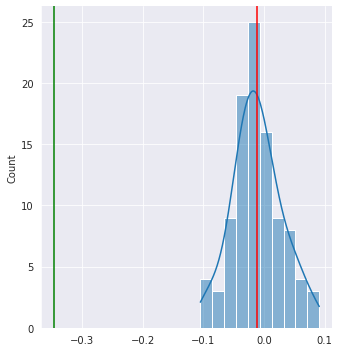

In [12]:
figure = sns.displot(data=degree_assortatitives_gen, kde=True)
plt.axvline(np.mean(degree_assortatitives_gen), color='red')
plt.axvline(gentoo_degree_assortatives, color='green')

Also, we will need to make a one-sample t-test to check if the difference between degree assortative coefficient for empirical and random networks happened accidentally or because not enough generated samples.

Lets choose the confidence level of 99%: if the $p-value$ will be less than 0.01 so we can reject the null hypothesis.

Let`s define the hypothesis:
- Null hypothesis - the mean value of the assortativity coefficient in the network generated from the G(n, p) model is equal to gentoo_degree_assortatives variable
- Alternative hypothesis - the mean value of the assortativity coefficient in the network genearted from the G(n, p) model is greater or lower than the gentoo_degree_assortatives variable

In [13]:
stats.ttest_1samp(degree_assortatitives_gen, popmean=gentoo_degree_assortatives)

Ttest_1sampResult(statistic=81.76253988212109, pvalue=1.0744581983119048e-92)

Definitely the p-value is less than 0.01, so we reject our null hypothesis.

According to the graph real world network assortativity coefficient and averaged assortativity coefficient of randomly generated networks are quite different. The coefficient shows does the network has the preference to connect to same or different degrees of nodes(there are some reasons for such pattern. But at the same time there is no such pattern for G(n, p) model.

## 2. Random graph models

### (a) Derive an expression for the degree distribution of a microstate generated by the $G(n, p)$ model for random undirected networks with self-loops.

The given node in the undirected network with self-loops is connected with independent probability $p$ to each of the $n$ nodes. Hence, the probability of being connected exactly with $k$ nodes and no more is

$$p^{k}(1 - p)^{n - k}$$

The $k$ edges can be generated in $n \choose k$ ways, hence the total probability distribution is:

$$p_{k} = {n \choose k} p^{k} (1 - p)^{n - k}$$

### (b) In the lecture you have seen that the triadic closure of a network can be computed by averaging the local clustering coefficients of all nodes. Another, non-equivalent, way to compute the triadic closure of a network is given by the so called global clustering coefficient. This measure is defined as the fraction between the number $T$ of closed triads and the total number of triads $M$ (closed $T$ or not) in a network, i.e. $C = \frac{T}{M}$. Consider a $G(n, p)$ network with mean degree $c = np$. Using the independence of edges in a $G(n, p)$ compute the expected global clustering coefficient in the limit of large n.

Global Clustering Coefficent is defined as number of closed triads over number of all triads (closed or not.) Every triad is counted three times if it exists, since it can be counted three times, each of them leading with one of its three edges (hence the coefficient 3 in calculations).

${n \choose 3}$ is chooses 3 nodes for each triad from given $n$ nodes.
$C = \frac{T}{M}$
$T = 3{n \choose 3}p^{3}$
$M = 3{n \choose 3}p^{2}$

So we have:

$$\lim_{n \rightarrow \infty} \frac{3 {n \choose 3} p^{3}}{3 {n \choose 3} p^2} =
\lim_{n \rightarrow \infty} p = p
$$


So the limit approaches $p$.